# Simple Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os
import fnmatch
import glob
import re

pd5='/research/ljindal/alian/gem5'
directory='/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4'
colors = ['#0000ff', '#ff00ff', '#00ffff', '#00FF00', '#FF0000']

/research/ljindal/alian/gem5
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
5
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
./tux2/m5out
tux2/m5out
tux2
tux2
('tux_num is ', '2')
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4/tux2/m5out
['cum.allcores.csv', 'cum.core1.csv', 'cum.core0.csv', 'cum.core3.csv', 'cum.core2.csv']
('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


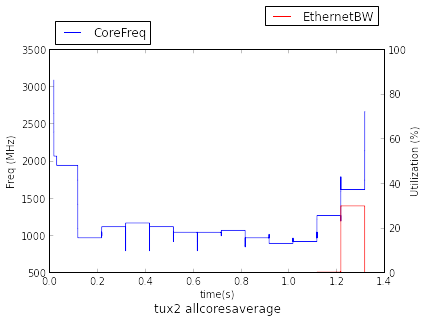

('core_num is ', '1')


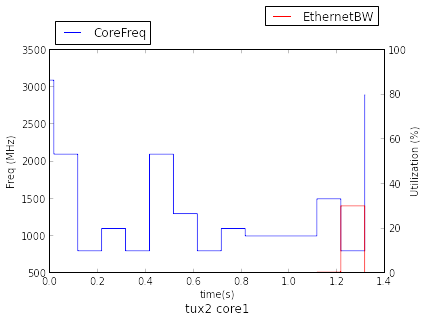

('core_num is ', '0')


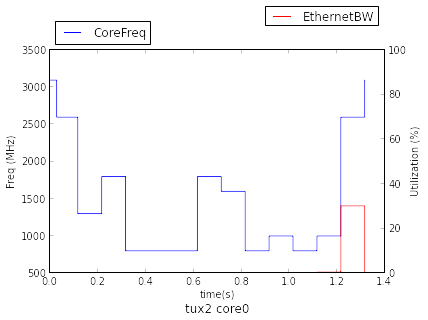

('core_num is ', '3')


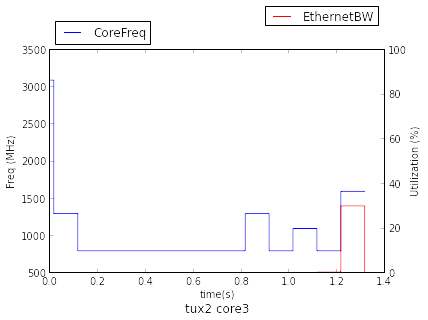

('core_num is ', '2')


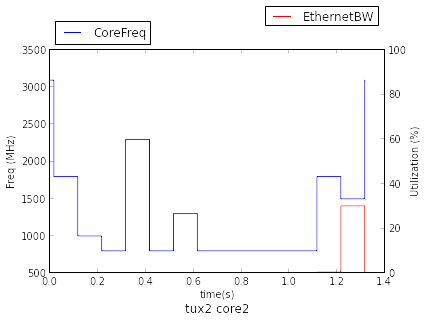

/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
./tux1/m5out
tux1/m5out
tux1
tux1
('tux_num is ', '1')
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4/tux1/m5out
['cum.core0.csv', 'cum.core1.csv', 'cum.core2.csv', 'cum.core3.csv', 'cum.allcores.csv']
('core_num is ', '0')


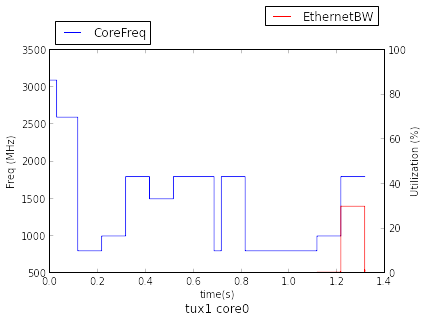

('core_num is ', '1')


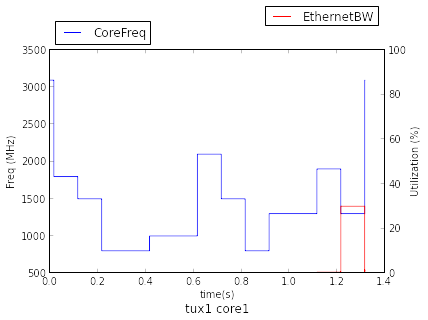

('core_num is ', '2')


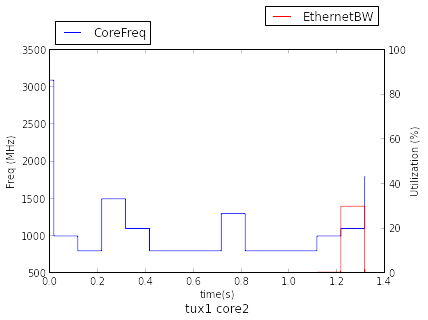

('core_num is ', '3')


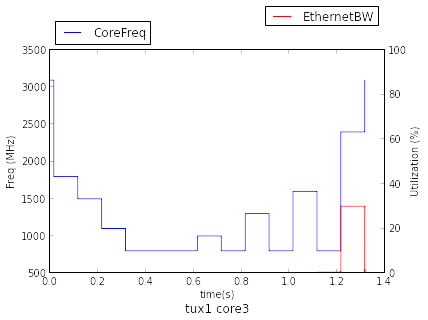

('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


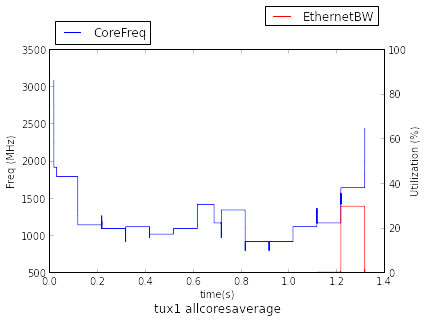

/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
./switch/m5out
switch/m5out
switch
switch
('ERROR! coud not find tux_num in', './switch/m5out')
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4/switch/m5out
[]
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
./tux3/m5out
tux3/m5out
tux3
tux3
('tux_num is ', '3')
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4/tux3/m5out
['cum.core2.csv', 'cum.allcores.csv', 'cum.core3.csv', 'cum.core0.csv', 'cum.core1.csv']
('core_num is ', '2')


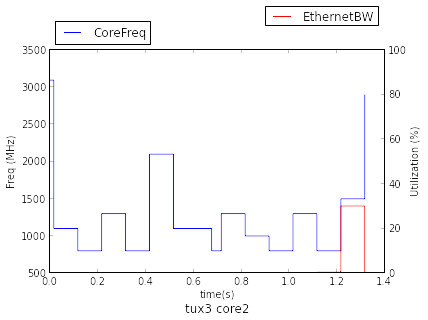

('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


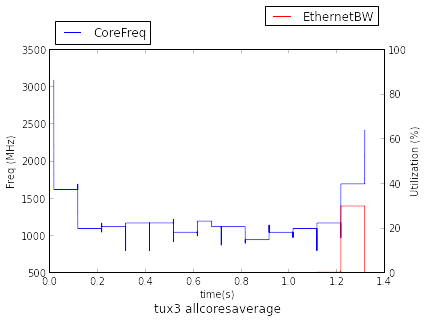

('core_num is ', '3')


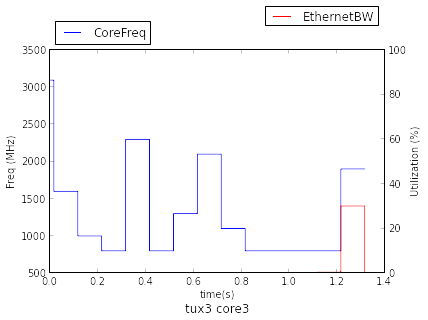

('core_num is ', '0')


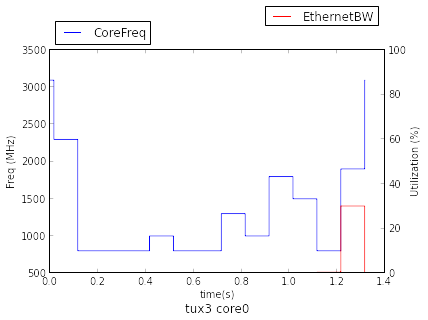

('core_num is ', '1')


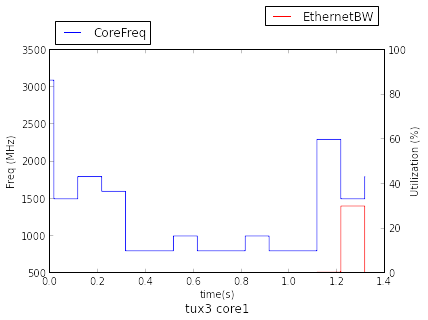

/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4
./tux0/m5out
tux0/m5out
tux0
tux0
('tux_num is ', '0')
/research/ljindal/alian/gem5/rundir/PARSE_NPB_CONFIGS/NEHALEM_NPB_L10_B160_J1600/npb_mg_4/tux0/m5out
['cum.core0.csv', 'cum.core1.csv', 'cum.core2.csv', 'cum.allcores.csv', 'cum.core3.csv']
('core_num is ', '0')


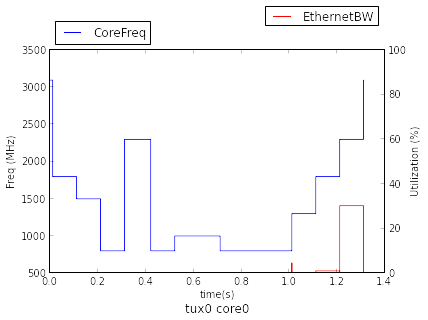

('core_num is ', '1')


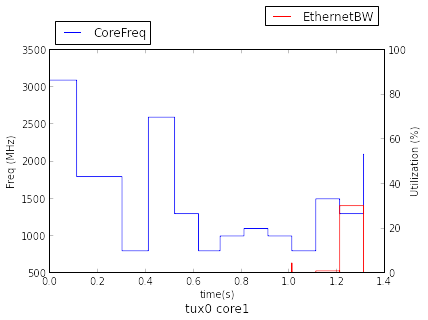

('core_num is ', '2')


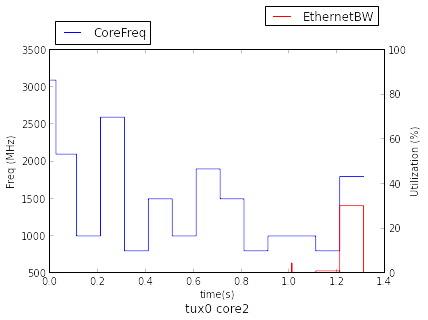

('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


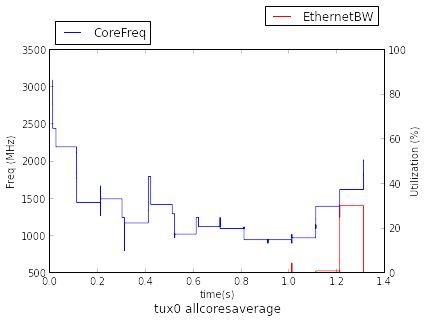

('core_num is ', '3')


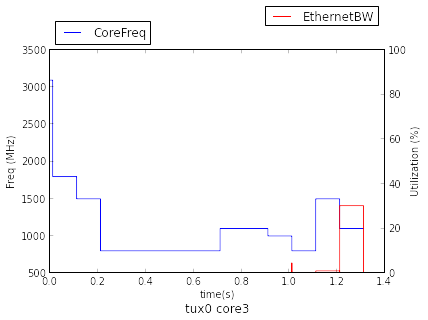

('total graphs plotted = ', 20)


In [ ]:
%cd $pd5
%cd $directory
matches = []
total_graphs = 0
for root, dirnames, filenames in os.walk('.'):
  for filename in fnmatch.filter(filenames, 'stats.txt'):
    matches.append(os.path.join(root, filename))
    
print len(matches)

for statsfile in matches:
    statsdir = os.path.dirname(statsfile)
    %cd $directory
    print statsdir
    tuxname = os.path.normpath(statsdir)
    print tuxname
    tuxname = tuxname[:-6] # remove '/m5out' from the path
    print tuxname
    tuxname = os.path.basename(tuxname)
    print tuxname
    try:
        m = re.match('tux([0-9])', tuxname)
        tux_num = m.group(1)
        print ('tux_num is ', tux_num)
    except AttributeError:
        print ('ERROR! coud not find tux_num in', statsdir)
        exit(0)
    
    %cd $statsdir
    csvfiles = []
    for myfile in os.listdir('.'):
        if fnmatch.fnmatch(myfile,'*core*.csv'):
            csvfiles.append(myfile)
    print csvfiles
    
    for csv in csvfiles:
        core_num = '-1'
        try:
            m = re.match('cum.core([0-9]).csv', csv)
            core_num = m.group(1)
            print ('core_num is ', core_num)
        except AttributeError:
            print ('*****DANGER***** coud not find core_num in', csv)
            
        # now let's plot some graph for the csv
        fig, ax1 = plt.subplots()
        data = np.genfromtxt(csv, delimiter=',', skip_header=1,
                             names=['CumSimSec', 'Freq', 'B1' , 'IntUtil','FloatUtil','MemUtil','B2' ,'EthBytes','EthBW', 'EthTotBW','SimSec'])
        
        ax1.plot(data['CumSimSec'], data['Freq'],colors[0], label='CoreFreq')
        ax1.set_ylim(500,3500)
        ax1.set_xlabel('time(s)')
        ax1.set_ylabel('Freq (MHz)')
        lgd1 = ax1.legend(loc='upper left', bbox_to_anchor=[0,1.15])
        
        ax2 = ax1.twinx()
        #ax2.plot(data['CumSimSec'], data['IntUtil'],colors[1], label='IntUtil')

        ax2.set_ylabel('Utilization (%)')
        ax2.set_ylim(0,100)

        #ax2.plot(data['CumSimSec'], data['FloatUtil'],colors[2], label='FloatUtil')
        #ax2.plot(data['CumSimSec'], data['MemUtil'],colors[3], label='MemUtil')
        ax2.plot(data['CumSimSec'], data['EthBW'],colors[4], label='EthernetBW')
        lgd2 = ax2.legend(loc='upper right', bbox_to_anchor=[1,1.22], ncol=2)
        
        if (core_num == '-1'):
            ax1.set_title('tux' + tux_num + ' allcoresaverage', y=-0.20)
            fig.savefig('tux'+tux_num+'allcoresaverage.png', dpi=200, bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')
        else:
            ax1.set_title('tux' + tux_num + ' core' + core_num, y=-0.20)
            fig.savefig('tux'+tux_num+'core'+core_num+'.png', dpi=200, bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')
        
        total_graphs = total_graphs + 1
        plt.show()
        
print ('total graphs plotted = ' , total_graphs)
        